# Project 2:  Lucid Titanic Sleuthing

## Part 1: Developing an understanding of the data

#### Based on the description of the data you read in the readme describe in your own words this data.

The Data set is a desription of the 1309 passengers, we have data collected.  Not at all an exhaustive list.  The Data is broken into columns representing PClass, Survived, Name, Sex, Age, Sibsp, Parch, Ticket Number, Fare in dollars, Cabin Number, the Embarkment City (reprsented C, Q or S), Boat, Body found or not and Home/Dest.  

To further break down the Subsections PClass, Survived is one of two outputs 1 for survived and O for not.  We find SibSp meaning you are either a spouse or sibling of another passenger onboard.   Parch meaning you are a parent or child of another passenger onboard.  Embarkment city is one of 3 cities C for Cherbourg, S for Southhampton, and Q for Queenstown.  



#### Based on our conceptual understanding of the columns in this data set.  What are the reasonable range of the values for the Sex, Age, SibSp, Parch columns.

The reasonable values for Sex would be either Male or Femal.  For Age I would expect anywhere from the maximum age of 80 to an infant.  By printing the ages I see ages represented by floats less than 1.  For the parch category, I ran a max value which returned 9.  Giving parch stands for parent/children present on board, it logical to assume that there are a few large families, 1 or 2 parents with 7 kids.  Also, running a max on the SibSp category, which returnd 8, its logical to once again say it stands more for a family with lots of children rather than a family with lots of spouses.  So the range of 8 is a good value.  

### Open the data in sublime text is there anything that jumps out to you?

## Part 2: reading the data in

#### Now read the data into a Pandas DataFrame

In [2]:
#reading in Titanic csv file 
import pandas as pd
import numpy as np


Titanic = pd.read_csv('titanic.csv') 
Lusitania = pd.read_csv('lusitania.csv')

Titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Check that the age column doesn't have any unreasonable values 

I wouldn't say the 'Age' column has unreasonable values, but values that appear abnormal.  For instance, we have NaN values or values unknow.  Also, we have values under 1.  As indicated previouly 


In [2]:
import math

Titanic.age

0       29.00
1        0.92
2        2.00
3       30.00
4       25.00
5       48.00
6       63.00
7       39.00
8       53.00
9       71.00
10      47.00
11      18.00
12      24.00
13      26.00
14      80.00
15        NaN
16      24.00
17      50.00
18      32.00
19      36.00
20      37.00
21      47.00
22      26.00
23      42.00
24      29.00
25      25.00
26      25.00
27      19.00
28      35.00
29      28.00
        ...  
1279    14.00
1280    22.00
1281    22.00
1282      NaN
1283      NaN
1284      NaN
1285    32.50
1286    38.00
1287    51.00
1288    18.00
1289    21.00
1290    47.00
1291      NaN
1292      NaN
1293      NaN
1294    28.50
1295    21.00
1296    27.00
1297      NaN
1298    36.00
1299    27.00
1300    15.00
1301    45.50
1302      NaN
1303      NaN
1304    14.50
1305      NaN
1306    26.50
1307    27.00
1308    29.00
Name: age, dtype: float64

In [3]:
#Printing the minimum and maximum ages 
Titanic.age.min()

0.17000000000000001

In [4]:
Titanic.age.max()

80.0

 Check for missing values.  How do you know that a value is missing?

In [4]:
## Assuming missing Values in the Titanic Data Set are represented by 'NaN'.  We have 263 missing age values
Titanic.age.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15       True
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1279    False
1280    False
1281    False
1282     True
1283     True
1284     True
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291     True
1292     True
1293     True
1294    False
1295    False
1296    False
1297     True
1298    False
1299    False
1300    False
1301    False
1302     True
1303     True
1304    False
1305     True
1306    False
1307    False
1308    False
Name: age, dtype: bool

#### Does it makes sense to guess at the value?

Yes it does.  It makes sense to make an educated guess.  I am going to look at filling in the missing ages based upon
the pasenger's titlle.  The title seems to be a relatively good place to check for average ages. 

## Part 3: data imputation

#### Well let’s say that it does... You likely noticed that Age has some missing values. How many are missing?

In [5]:
Titanic.age.isnull().sum() 

263

#### For the Age of the passangers ... how would you guess at the missing values using the other data present in the CSV.

[]

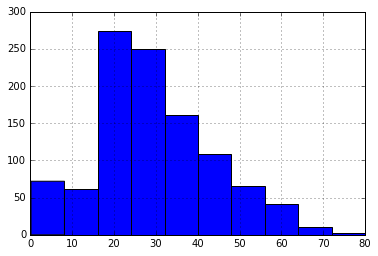

In [7]:
import matplotlib as mpl
%matplotlib inline


Titanic['age'].hist().plot(kind='bar')

#Creating graph to gauge age ranges for Titanic Passengers


In [8]:
def get_title(x):
    return x.split(",")[1].split(".")[0].strip()



Titanic["title"] = Titanic["name"].apply(get_title)
Titanic["title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: title, dtype: int64

###### Above we can see several titles having 2 or less passengers.  Any of those missing should be easy to fill.  Next, going to create new data set of Age and Title and then group by the Title and to average the Age.  

In [11]:
Titanic1 = Titanic[['title','age']]

Titanic1.groupby('title').mean() 

,age
title,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


###### Now we can see, for instance, the average age for a Mr. being 32.2 and for a Mrs. 36.9.  Interesting we have an average age for Master at 5.5 meaning a lot of young boys were present on the ship.

In [14]:
Titanic.age = Titanic['age'].fillna(Titanic.groupby('title')['age'].transform('mean'))
Titanic.age.head(20)

0     29.000000
1      0.920000
2      2.000000
3     30.000000
4     25.000000
5     48.000000
6     63.000000
7     39.000000
8     53.000000
9     71.000000
10    47.000000
11    18.000000
12    24.000000
13    26.000000
14    80.000000
15    32.252151
16    24.000000
17    50.000000
18    32.000000
19    36.000000
Name: age, dtype: float64

# Part 4: Group Statistics

#### Are there any groups that were especially adversely affected in the Titanic wreck? (justify your response numerically)

By taking the pivot table below I split the survival columns by sex, male and female as well as pclass, 1, 2, or 3.  
Based on the data I see that Men in the 3rd class have the worst survival rate.  Of the 493 only 75 or 15% survival rate.  But in general being a man on the Titanic were not good odds.  Out of the 500 passengers who survived only 161 or 32% were male.  Conversley when evaluating survival rate among women for 1st class there was a 96%, class 2 a 89%, and for class 3 a 49% chance of survival each better than the survival rate among men.  

In [23]:
Titanic_Sex = Titanic.pivot_table('title', index=['sex', 'pclass'], columns=['survived'], aggfunc=len, margins=True)

In [24]:
Titanic_Sex['Survival Rate'] = Titanic_Sex[1] / (Titanic_Sex[1] + Titanic_Sex[0])

In [25]:
Titanic_Sex

survived           0      1     All  Survival Rate
sex    pclass                                     
female 1         5.0  139.0   144.0       0.965278
       2        12.0   94.0   106.0       0.886792
       3       110.0  106.0   216.0       0.490741
male   1       118.0   61.0   179.0       0.340782
       2       146.0   25.0   171.0       0.146199
       3       418.0   75.0   493.0       0.152130
All            809.0  500.0  1309.0       0.381971

#### Are there any groups that outperformed the survival of the latter group? (justify your response numerically)


To answer the next question I split the set of data to show the survival based on Title.  Here, based on the data I see some grouping of men did have high rates of survival.  The lone Capt., The set of Colonals, The lone Don, and both Dr.s all survived.  Whats interesting is when I looked at the set of Masters.  Masters I defined, via Google "A courtesy title for young boys too young to be addressed as Mr". and by average age of 5.48 its an valid description.  Among the subset of Masters it out of Master in pclass 1, and 2 they had a 100% survival rate.  For the pclass 3 the Masters subset survival ratio mirrored that of the average male survival, 33%.  

In [18]:
Titanic_Ratio = Titanic.pivot_table('age', index=['pclass', 'title'], columns=['survived'], aggfunc=len, margins=True)
Titanic_Ratio.fillna(0)

survived                 0      1     All
pclass title                             
1      Capt            1.0    0.0     1.0
       Col             2.0    2.0     4.0
       Don             1.0    0.0     1.0
       Dona            0.0    1.0     1.0
       Dr              2.0    4.0     6.0
       Jonkheer        1.0    0.0     1.0
       Lady            0.0    1.0     1.0
       Major           1.0    1.0     2.0
       Master          0.0    5.0     5.0
       Miss            3.0   57.0    60.0
       Mlle            0.0    2.0     2.0
       Mme             0.0    1.0     1.0
       Mr            110.0   49.0   159.0
       Mrs             2.0   75.0    77.0
       Sir             0.0    1.0     1.0
       the Countess    0.0    1.0     1.0
2      Dr              2.0    0.0     2.0
       Master          0.0   11.0    11.0
       Miss            3.0   47.0    50.0
       Mr            136.0   14.0   150.0
       Mrs             9.0   46.0    55.0
       Ms              0.0    1.0     1.0
       Rev             8.0    0.0     8.0
3      Master         30.0   15.0    45.0
       Miss           78.0   72.0   150.0
       Mr            388.0   60.0   448.0
       Mrs            31.0   34.0    65.0
       Ms              1.0    0.0     1.0
All                  809.0  500.0  1309.0

In [19]:
#Calculating the Survival Rate this time based over pclass and Title 
Titanic_Ratio['Survival Rate'] = Titanic_Ratio[1] / (Titanic_Ratio[0] + Titanic_Ratio[1])

In [20]:
Titanic_Ratio.fillna(0)

#Since survived can only have one of two numerical results 0 or 1, I used .fillna(0) to fill in the NaN values produced by 0 numberators. 
# 0 numerator division shows when entire groups or categories died.  

survived                 0      1     All  Survival Rate
pclass title                                            
1      Capt            1.0    0.0     1.0       0.000000
       Col             2.0    2.0     4.0       0.500000
       Don             1.0    0.0     1.0       0.000000
       Dona            0.0    1.0     1.0       0.000000
       Dr              2.0    4.0     6.0       0.666667
       Jonkheer        1.0    0.0     1.0       0.000000
       Lady            0.0    1.0     1.0       0.000000
       Major           1.0    1.0     2.0       0.500000
       Master          0.0    5.0     5.0       0.000000
       Miss            3.0   57.0    60.0       0.950000
       Mlle            0.0    2.0     2.0       0.000000
       Mme             0.0    1.0     1.0       0.000000
       Mr            110.0   49.0   159.0       0.308176
       Mrs             2.0   75.0    77.0       0.974026
       Sir             0.0    1.0     1.0       0.000000
       the Countess    0.0    1.0     1.0       0.000000
2      Dr              2.0    0.0     2.0       0.000000
       Master          0.0   11.0    11.0       0.000000
       Miss            3.0   47.0    50.0       0.940000
       Mr            136.0   14.0   150.0       0.093333
       Mrs             9.0   46.0    55.0       0.836364
       Ms              0.0    1.0     1.0       0.000000
       Rev             8.0    0.0     8.0       0.000000
3      Master         30.0   15.0    45.0       0.333333
       Miss           78.0   72.0   150.0       0.480000
       Mr            388.0   60.0   448.0       0.133929
       Mrs            31.0   34.0    65.0       0.523077
       Ms              1.0    0.0     1.0       0.000000
All                  809.0  500.0  1309.0       0.381971

In [22]:
Titanic.pivot_table('title', index=['pclass'], columns=['parch'], aggfunc=len)

Titanic.sibsp.max()

8

## Part 5:  Comparative Statistics:  Lusitania

#### Are there any groups that were especially adversely affected in the Titanic wreck? (justify your response numerically)

Code for the Lusitania Data is on Lusitania_Project2 notebook 

For groups adversley affected by the Lusitania wreck, I see the Passengers had the lowest rate of Survival.  Of the subsets of Passengers, Salon, Second, Third, Third(Distress British Seaman) they had Survial Rates of 39%, 38%, 36% and 0, 0. 

#### Are there any groups that outperformed the survival of the latter group? (justify your response numerically)



As I look througt the Data I split it into crew vs. passenger based on Title.  There is one group which sticks out.  If you were  a Miss working as a crew member you had an even lower survival rate of 26.7 or out of 15, 4 survived.

#### What does the group-wise survival rate imply about circumstances during these two accidents?

If I were to look into a group-wise survival rate I would say this.  
For the Titanic there's a total survival rate of 38.1% and for the Lusitania 38.9% so I believe that you had the same chance of survival roughly. 
